# Practice OCR using layout parser

### SET UP
First load required imports and create input/output folder paths

In [1]:
import layoutparser as lp
import pytesseract
import os
import cv2
from glob import glob
from pdf2image import convert_from_path
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#Define working directory
fldr = "/home/martin/new_jersey_arbitration/ocr_layoutparser"
os.chdir(fldr)

#Folder of pdfs:
pdf_folder = os.path.join(os.getcwd(),'pdf','')

#Temp folder to save images
image_folder = os.path.join(os.getcwd(), 'temp','')

#Secondary temp folder: for preprocessed images
image_folder_thresh = os.path.join(os.getcwd(), 'thresh','')

#Folder of text results
text_folder = os.path.join(os.getcwd(), 'text', '')

#Pdf files
pdf_files = glob(pdf_folder + '/*.pdf')

### Fetch Practice File
For the purpose of this test, we will practice one just one page of a pdf:

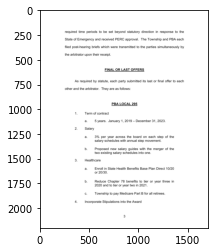

In [63]:
file = pdf_files[5]
filename = file.split('.pdf')[0].split('/')[-1]
images = convert_from_path(file)
image = images[2]
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

### Create Layout Parser Element: PubLayNet model

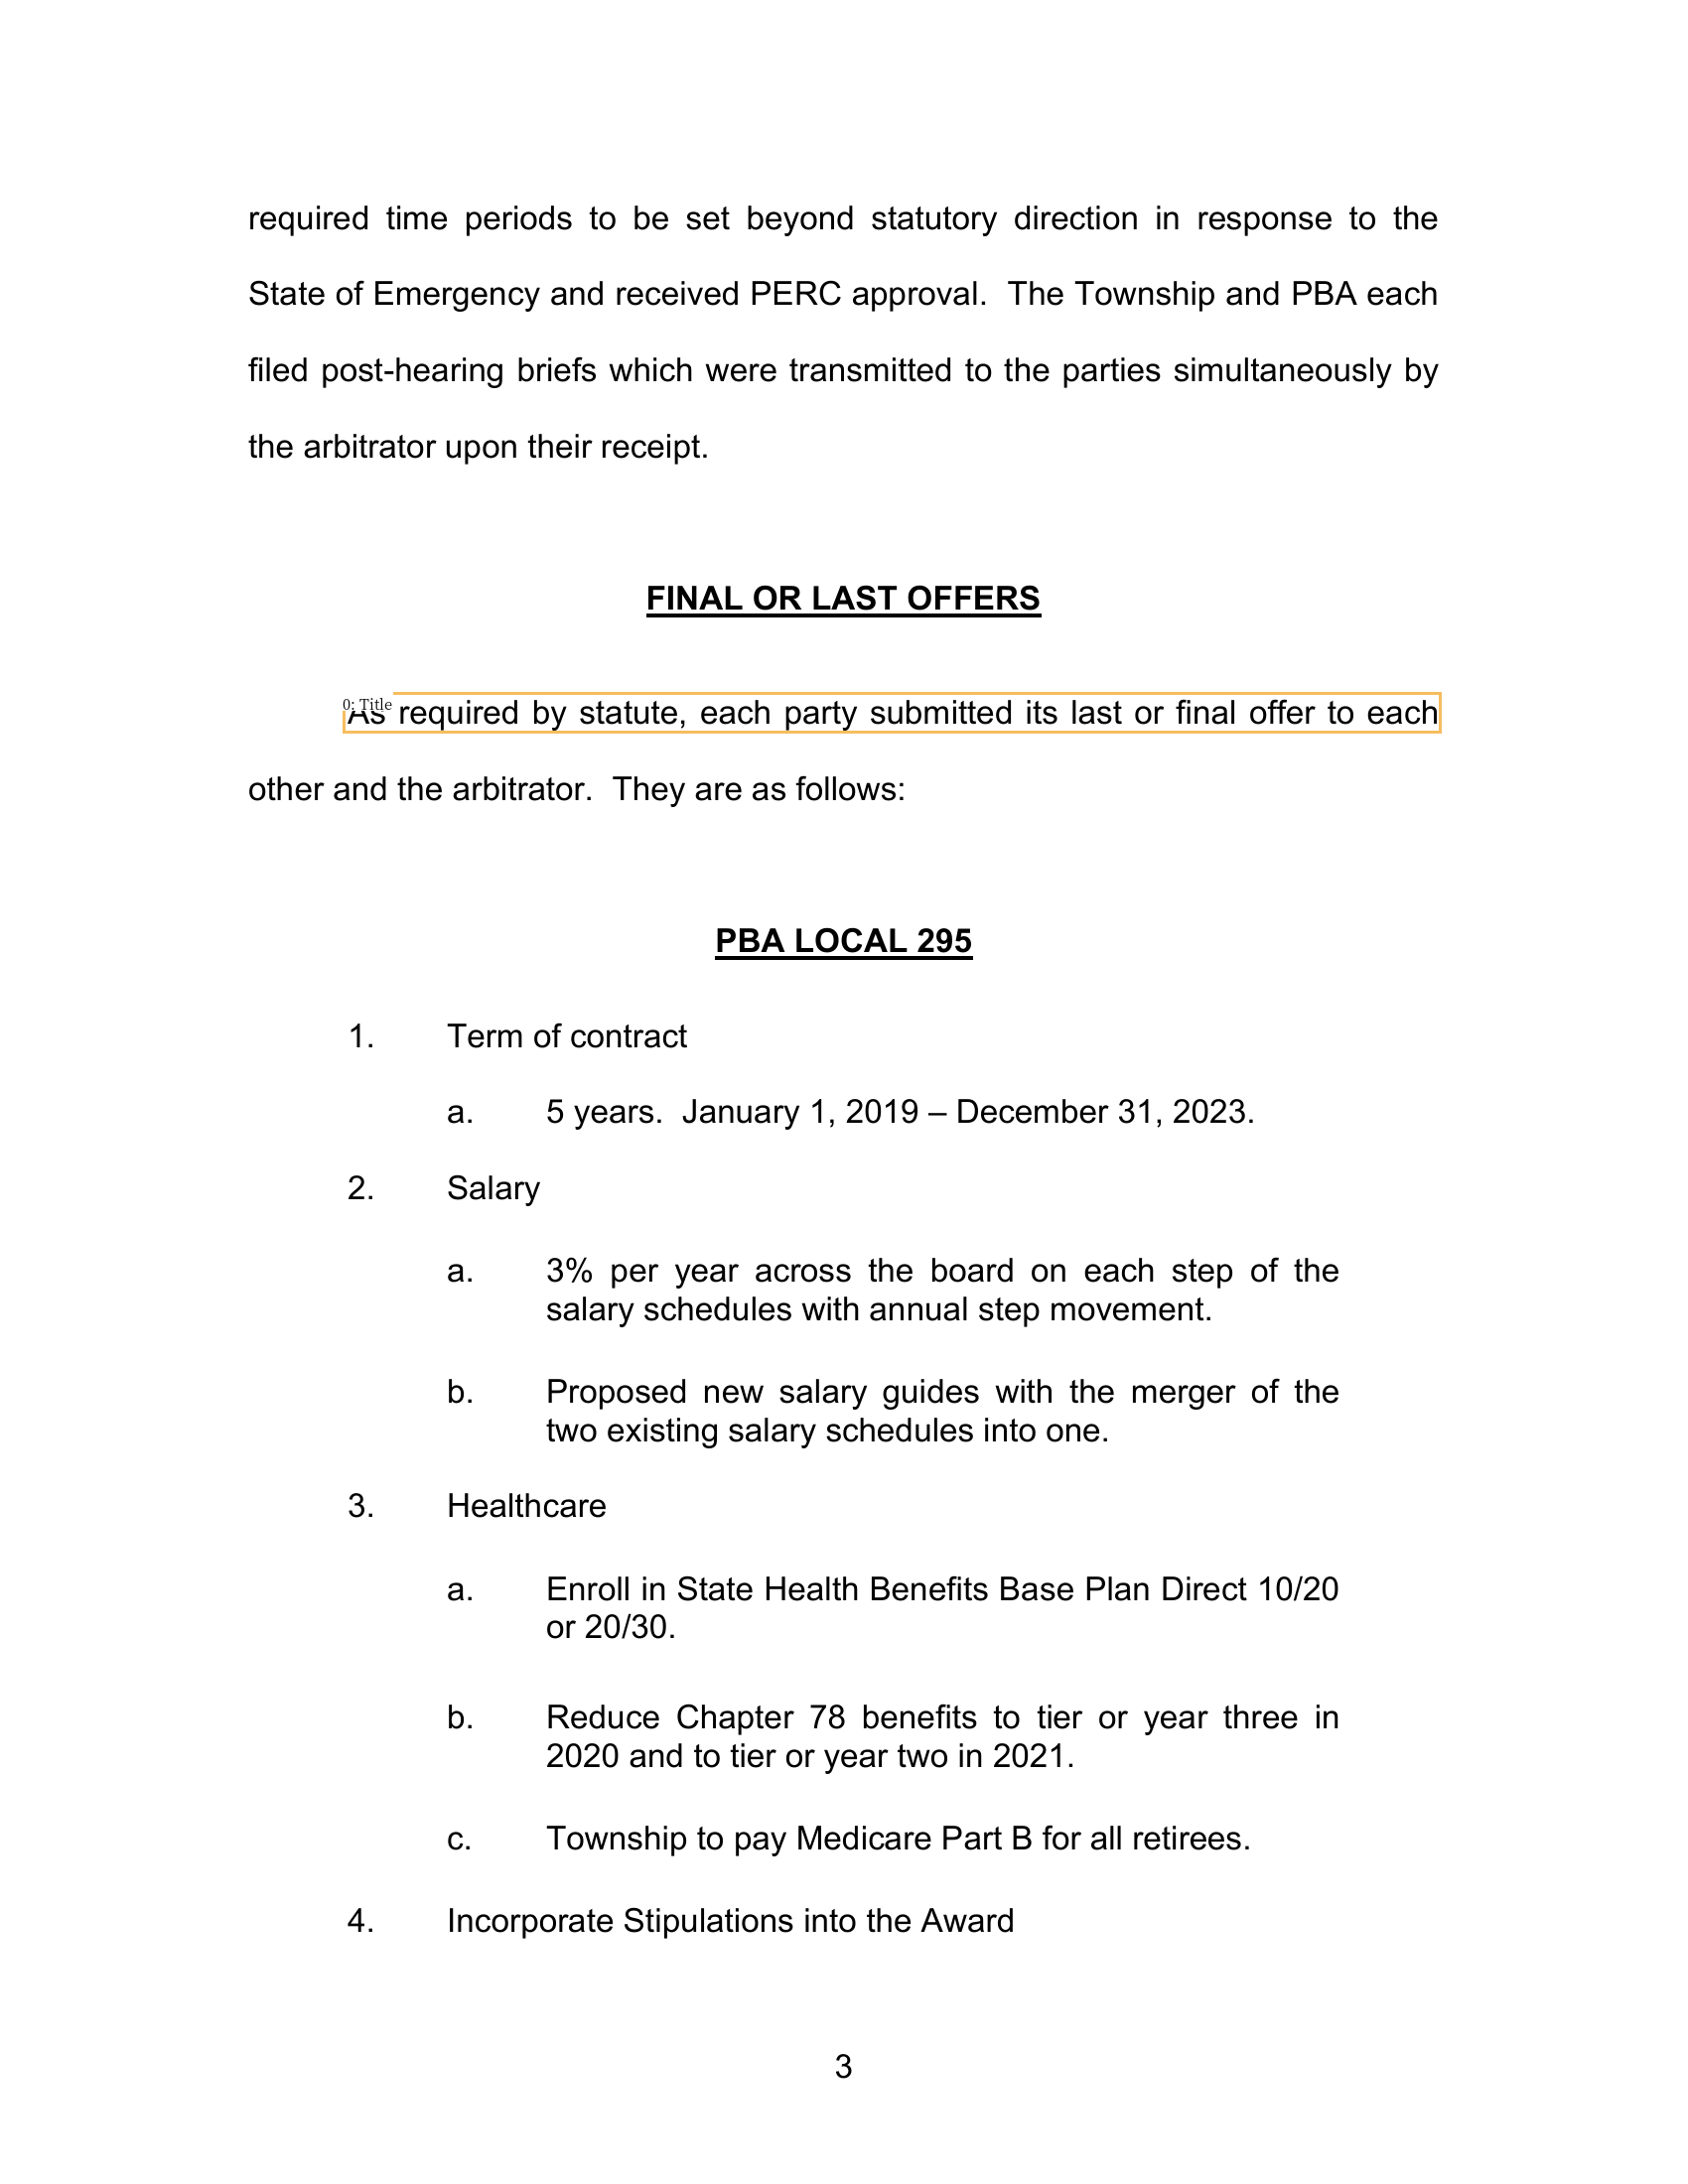

In [72]:
model = lp.Detectron2LayoutModel(
            config_path = 'lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config', # In model catalog
            label_map   ={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}, # In model`label_map'
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.9]
    )
layout = model.detect(image)
lp.draw_box(image, layout, box_width=3, show_element_id=True, show_element_type=True)

#### Clean Layot Parser Results

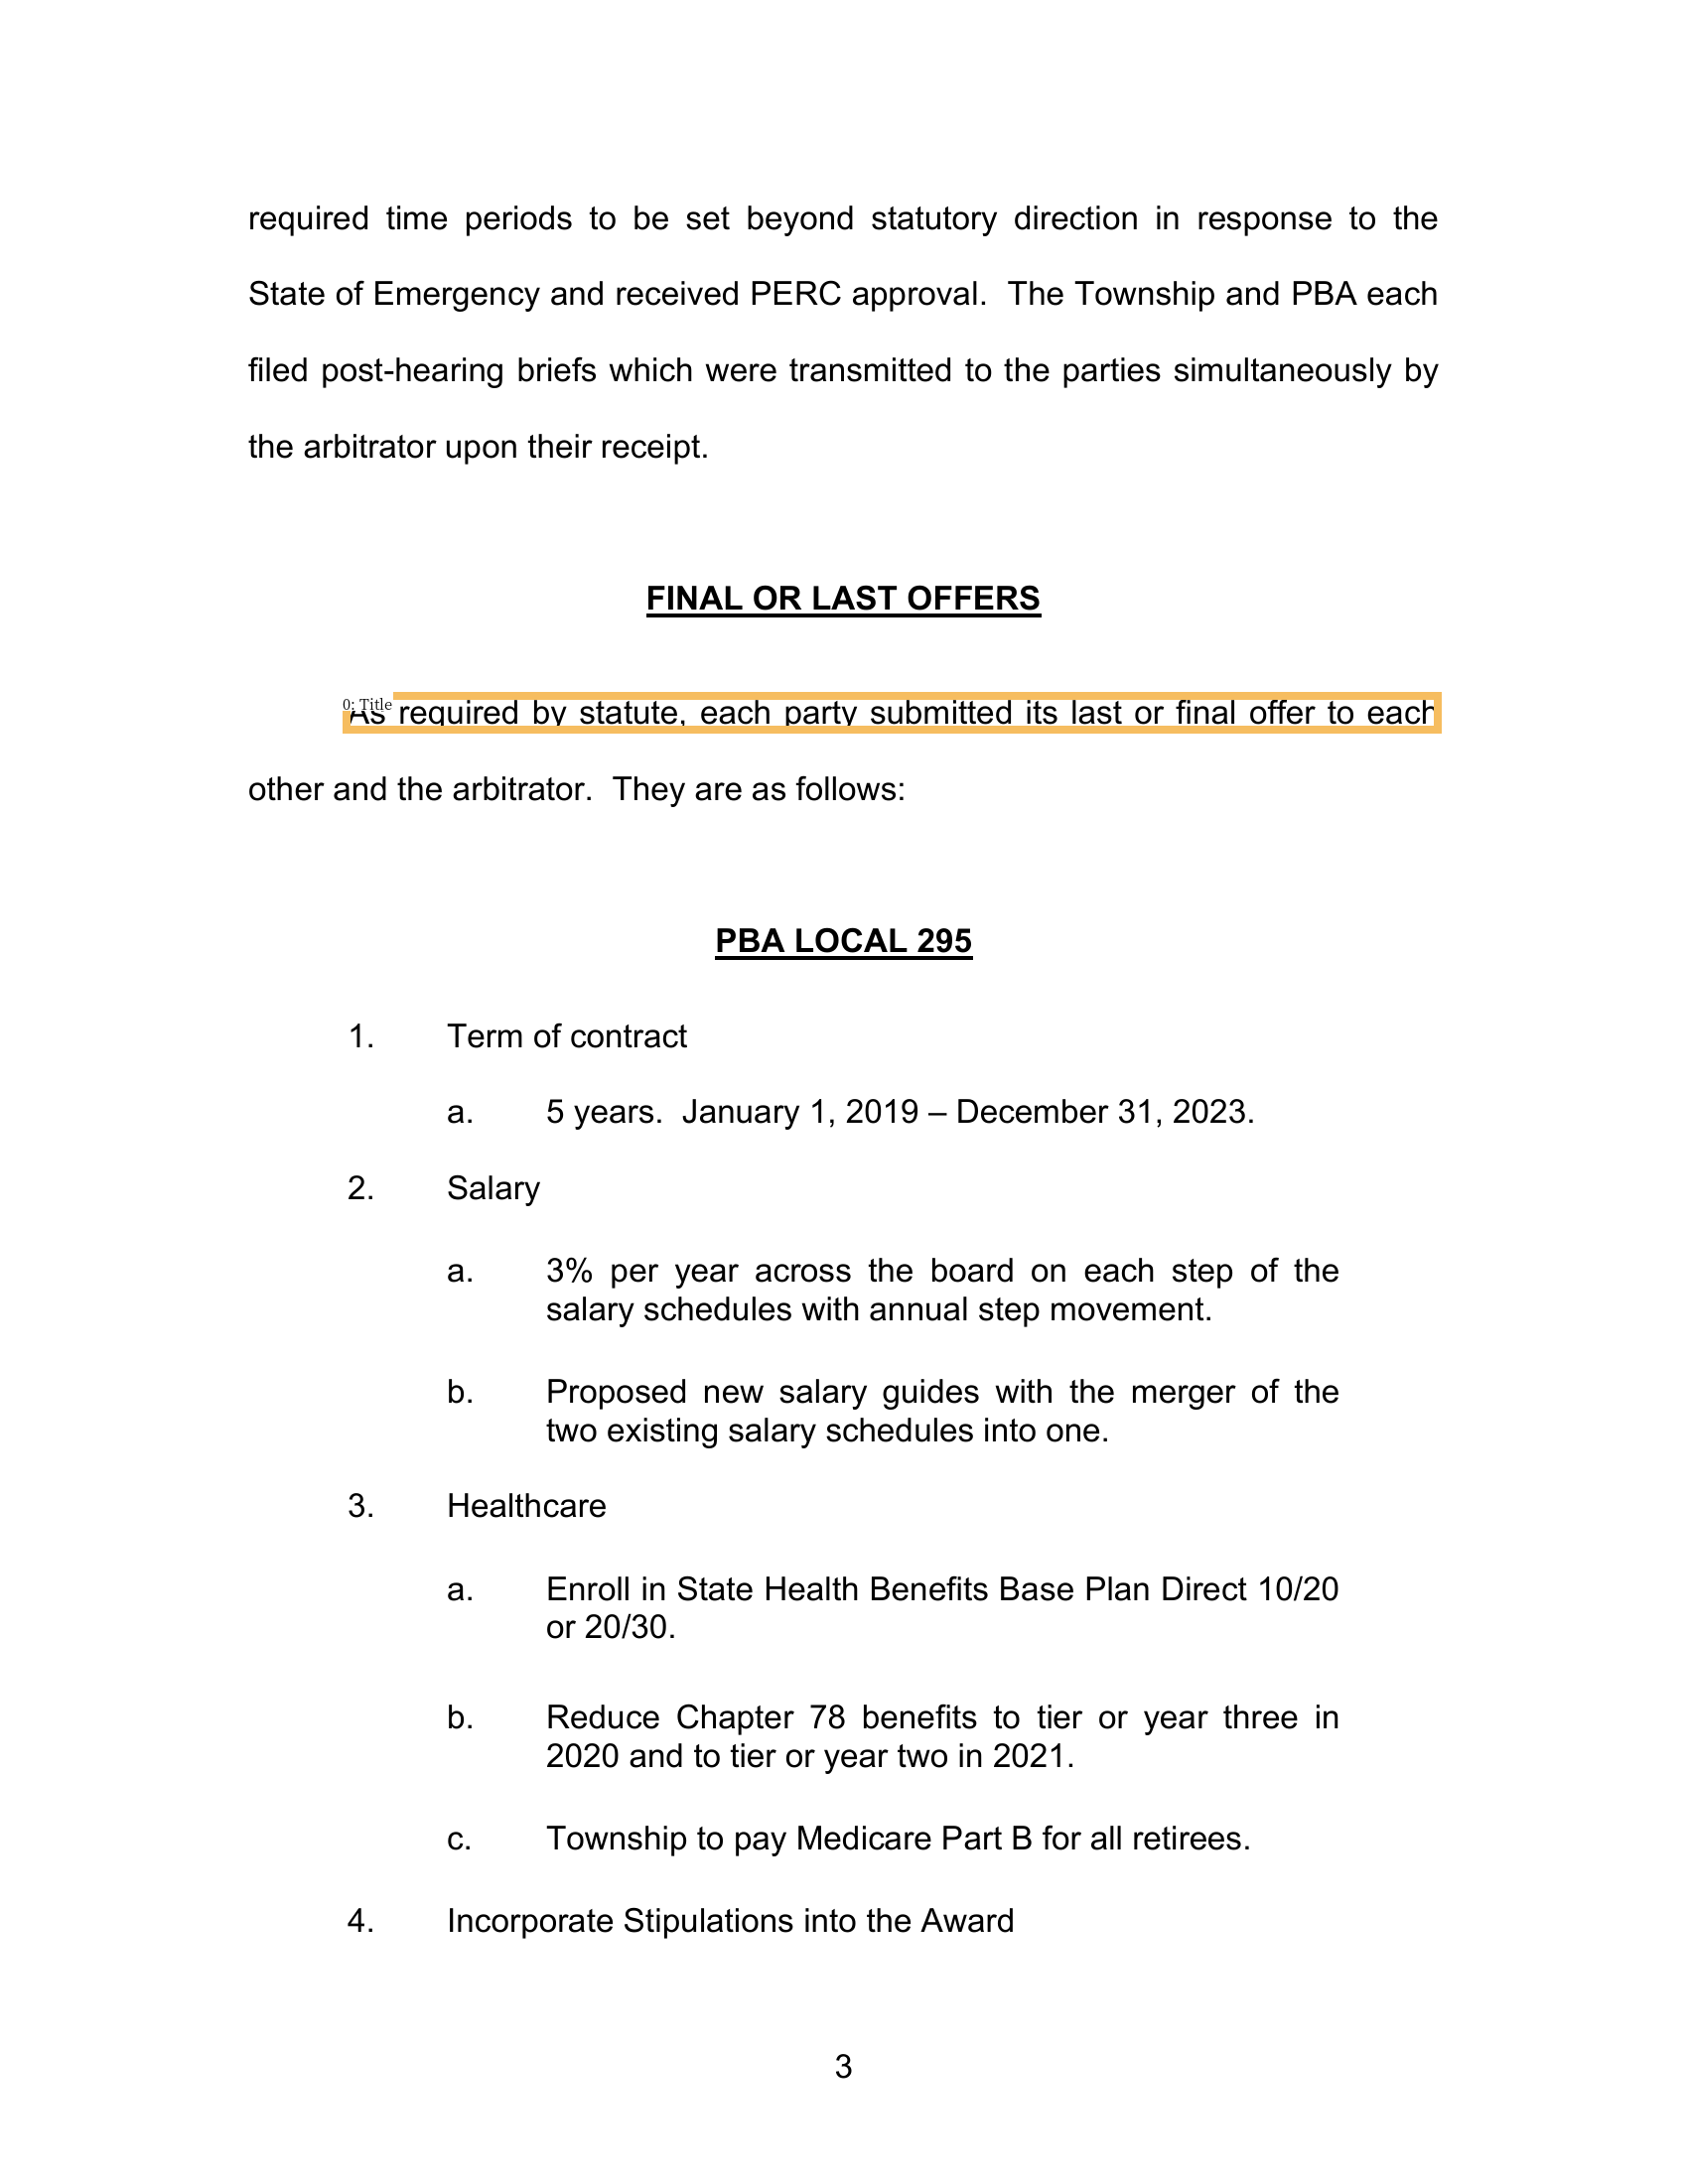

In [73]:
text_blocks = lp.Layout([b for b in layout if b.type in ['Text', 'Title']])
lp.draw_box(image, text_blocks, show_element_id=True, show_element_type=True)

In [74]:
ocr_agent = lp.TesseractAgent(languages='eng')

for block in text_blocks:
    text = ocr_agent.detect(image)
    block.set(text=text, inplace=True)
    
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

required time periods to be set beyond statutory direction in response to the
State of Emergency and received PERC approval. The Township and PBA each
filed post-hearing briefs which were transmitted to the parties simultaneously by

the arbitrator upon their receipt.

FINAL OR LAST OFFERS

As required by statute, each party submitted its last or final offer to each

other and the arbitrator. They are as follows:

PBA LOCAL 295

1. Term of contract
a. 5 years. January 1, 2019 — December 31, 2023.

2. Salary

a. 3% per year across the board on each step of the
salary schedules with annual step movement.

b. Proposed new salary guides with the merger of the
two existing salary schedules into one.

3. Healthcare

a. Enroll in State Health Benefits Base Plan Direct 10/20
or 20/30.

b. Reduce Chapter 78 benefits to tier or year three in
2020 and to tier or year two in 2021.

Cc. Township to pay Medicare Part B for all retirees.

4. Incorporate Stipulations into the Award

---


### Create Layout Parser Element: PrimaLayout Model

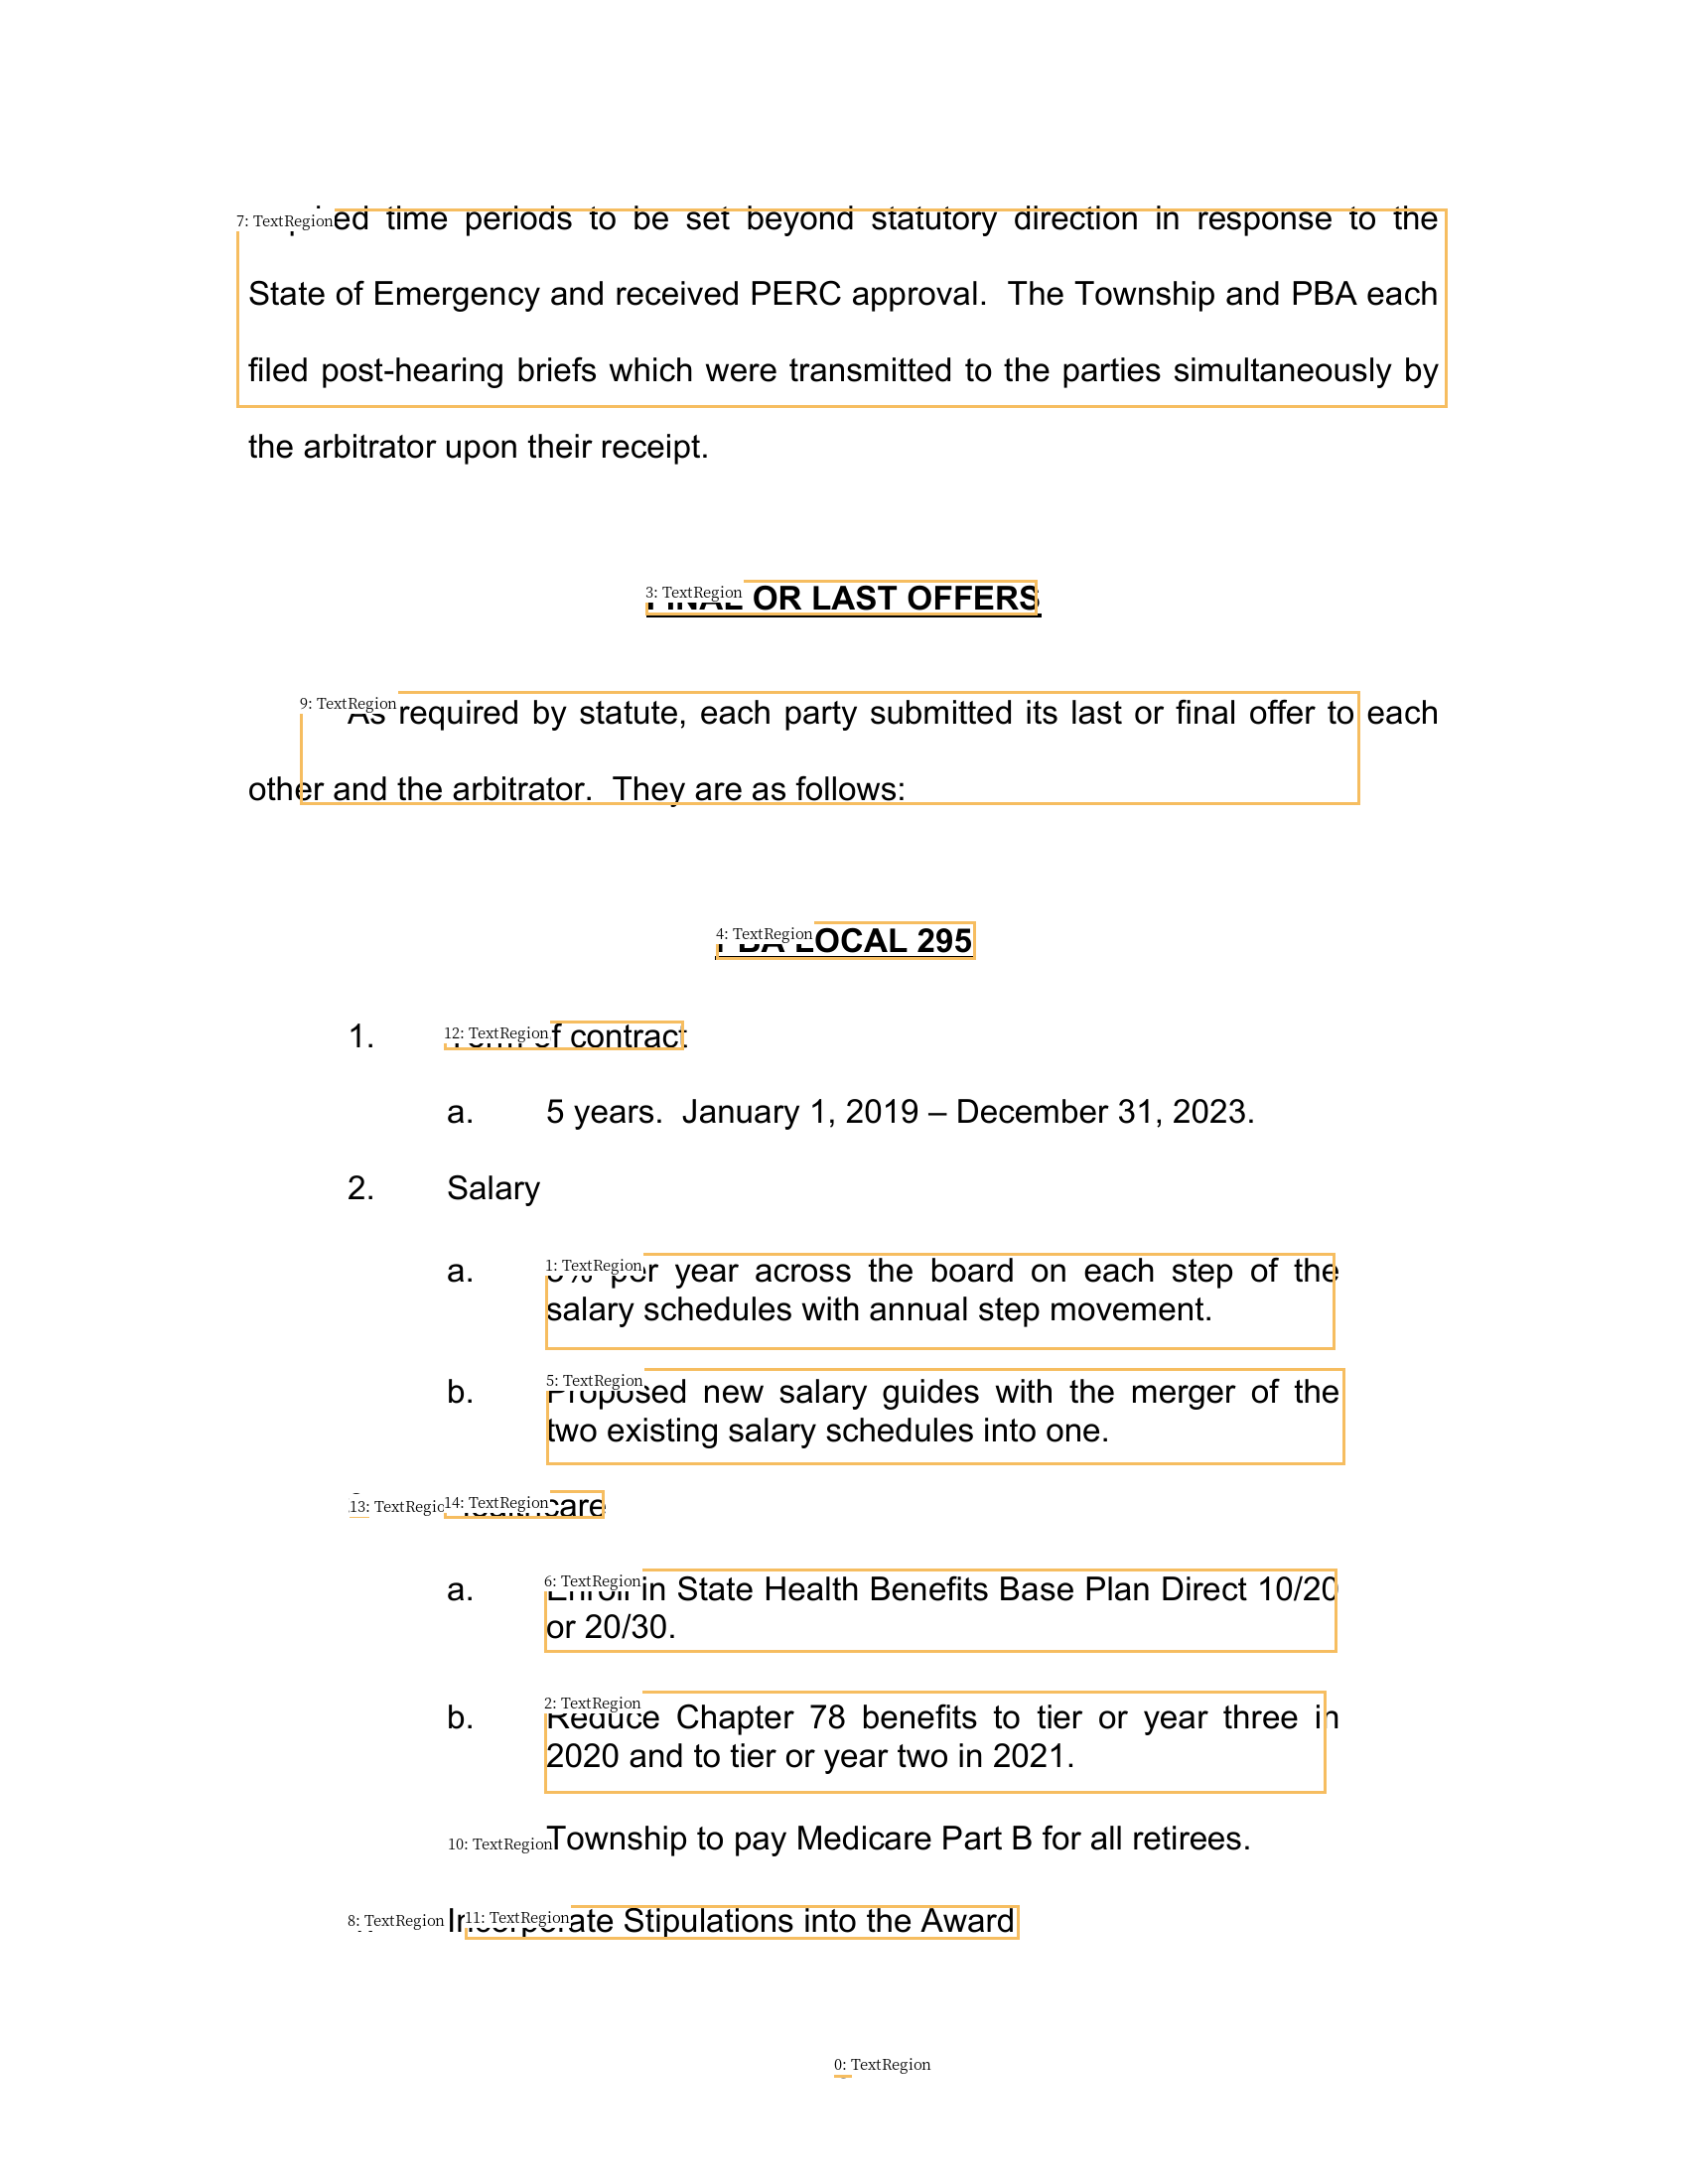

In [95]:
model_prima = lp.Detectron2LayoutModel(
            config_path = 'lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config', 
            label_map   ={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"},
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.95]
    )
layout_prima = model_prima.detect(image)
lp.draw_box(image, layout_prima, box_width=3, show_element_id=True, show_element_type=True)

In [96]:
text_blocks = lp.Layout([b for b in layout_prima if b.type in ['TextRegion']])
for block in text_blocks:
    segment_image = (block
                        .pad(left=5, right=5, top=5, bottom=5)
                        .crop_image(image))
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')


---
3% per year across the board on each step of the
salary schedules with annual step movement.

---
Reduce Chapter 78 benefits to tier or year three ir
2020 and to tier or year two in 2021.

---
FINAL OR LAST OFFERS

---
PBA LOCAL 295

---
Proposed new salary guides with the merger of the
two existing salary schedules into one.

---
Enroll in State Health Benefits Base Plan Direct 10/20
or 20/30.

---
required time periods to be set beyond statutory direction in response to the
State of Emergency and received PERC approval. The Township and PBA each

filed post-hearing briefs which were transmitted to the parties simultaneously by

---

---
As required by statute, each party submitted its last or final offer to

er and the arbitrator. They are as follows:

---

---
ncorporate Stipulations into the Award

---
Term of contract

---

---
Healthcare

---


### Using just OCR detection

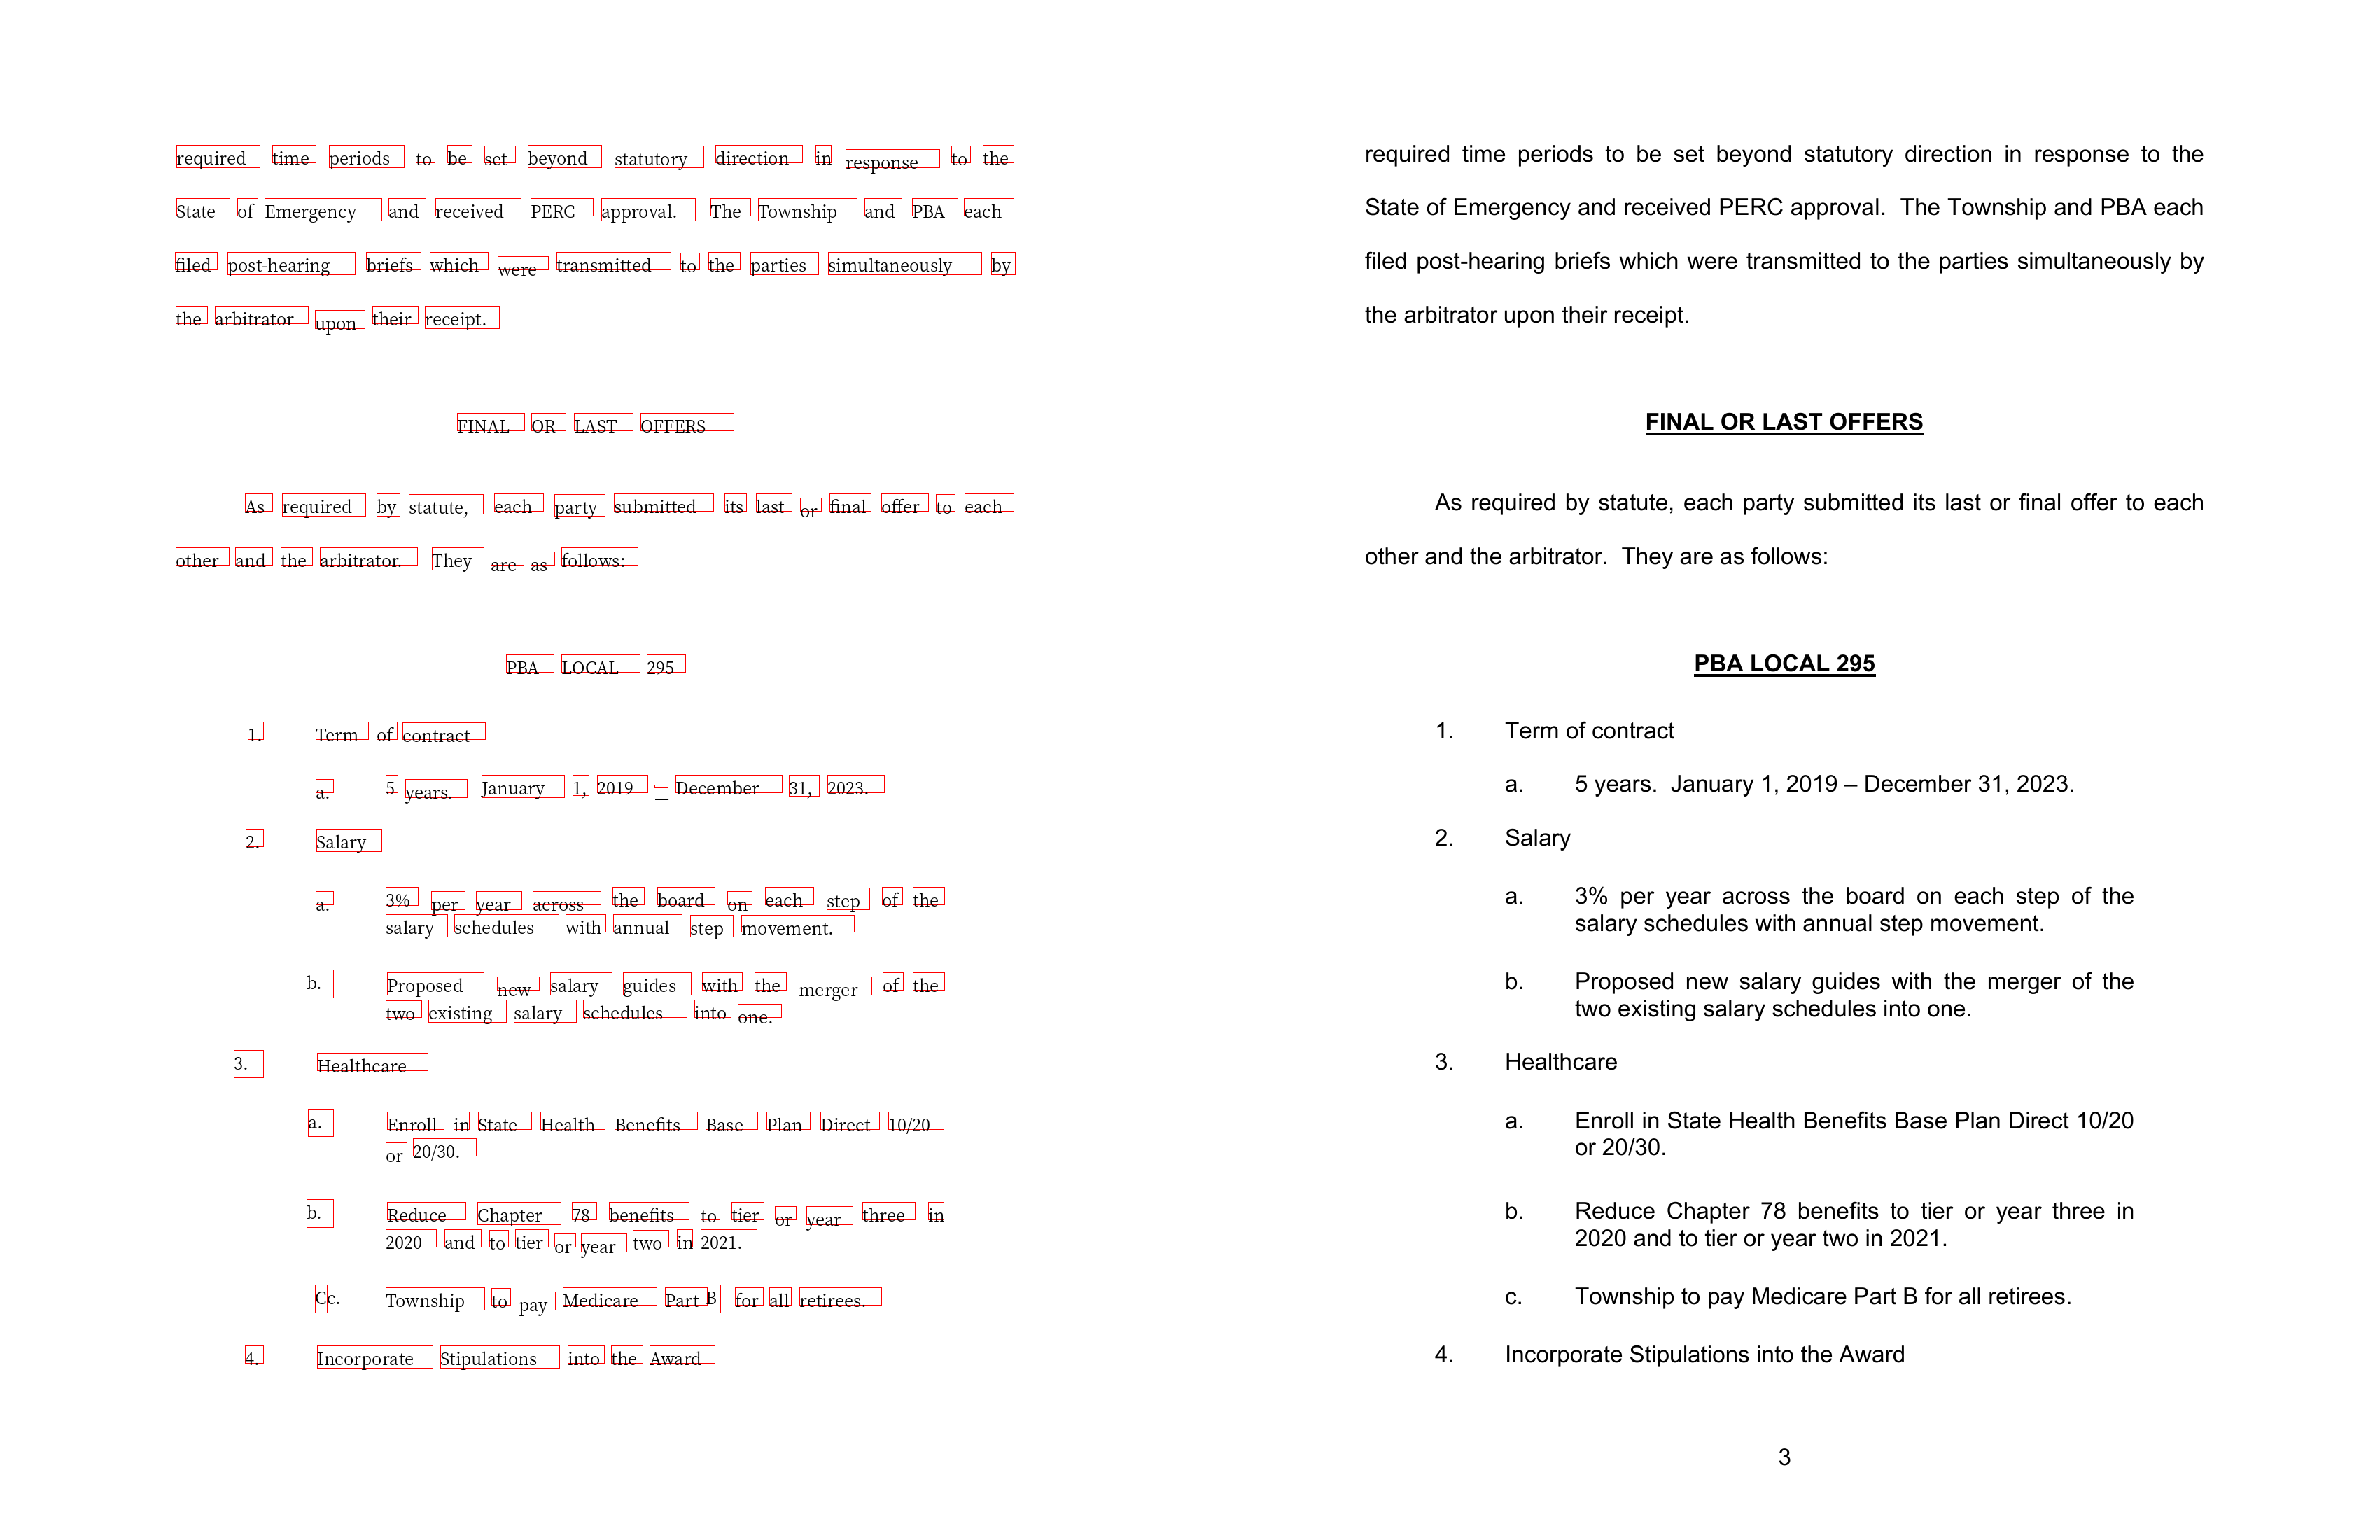

In [84]:
ocr_agent = lp.TesseractAgent(languages='eng')
res = ocr_agent.detect(image, return_response=True)
layout_ocr = ocr_agent.gather_data(res, agg_level = lp.TesseractFeatureType.WORD)
lp.draw_text(image, layout_ocr, font_size = 24, with_box_on_text = True, text_box_width=1)